<h1><strong><u>Breast Cancer Classifier Model</u></strong></h1>

In [1]:
%%capture
%run KNNBreastCancerClassifier.ipynb
%run LogisticBreastCancerClassifier.ipynb
%run NaiveBayesBreastCancerClassifier.ipynb

In [2]:
knn_classifier = knn_bc_classifier()
log_classifier = log_bc_classifier()
nb_classifier = nb_bc_classifier()
print(knn_classifier)
print(nb_classifier)
print(log_classifier)

Pipeline(steps=[('scale', StandardScaler()),
                ('clf', KNeighborsClassifier(n_neighbors=7))])
Pipeline(steps=[('scale', StandardScaler()), ('clf', GaussianNB())])
Pipeline(steps=[('scale', StandardScaler()),
                ('clf', LogisticRegression(C=0.3, random_state=1))])


<h2><strong><u>Final Model Selection</u></strong></h2>

<h3><strong><u>Cross-Validation Test</u></strong></h3>

In [3]:
pipeline = Pipeline(
    [
        ("clf", None)
    ]
)
param_grid = {"clf": [knn_classifier, log_classifier, nb_classifier]}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best Parameters:  {'clf': Pipeline(steps=[('scale', StandardScaler()),
                ('clf', LogisticRegression(C=0.3, random_state=1))])}


<h2><strong><u>Model Testing</u></strong></h2>

<h3><strong><u>Performance Metrics</u></strong></h3>

In [4]:
for key, value in clf_metrics.items():
    print(f"{key}")
    test_values = cross_val_score(best_model, X_test, y_test, scoring=value, cv=5)
    print(f"CV test Scores: ", test_values)
    np_test_values = np.array(test_values)
    average = np.mean(np_test_values)
    stDev = np.std(np_test_values)
    print(f"Average and Standard Error: ", "{:.2f}%".format(average.round(2)), "\u00B1", "{:.2f}%".format(stDev.round(4)*100), "\n")

Accuracy
CV test Scores:  [1.         1.         0.95652174 0.86956522 1.        ]
Average and Standard Error:  0.97% ± 5.07% 

Precision
CV test Scores:  [1.         1.         0.93333333 0.82352941 1.        ]
Average and Standard Error:  0.95% ± 6.89% 

Recall
CV test Scores:  [1. 1. 1. 1. 1.]
Average and Standard Error:  1.00% ± 0.00% 

Negative Predictive Value
CV test Scores:  [1. 1. 1. 1. 1.]
Average and Standard Error:  1.00% ± 0.00% 

Specificity
CV test Scores:  [1.         1.         0.88888889 0.66666667 1.        ]
Average and Standard Error:  0.91% ± 12.96% 



Text(0.5, 1.0, 'Final Breast Cancer Classifier: Confusion Matrix (Test)')

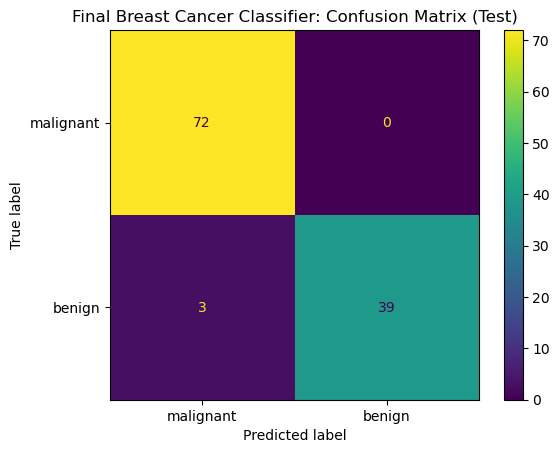

In [5]:
#Testing Confusion Matrix
test_predictions = best_model.predict(X_test)
disp = ConfusionMatrixDisplay.from_predictions(y_test, test_predictions, labels=['malignant', 'benign'])
disp.ax_.set_title("Final Breast Cancer Classifier: Confusion Matrix (Test)")

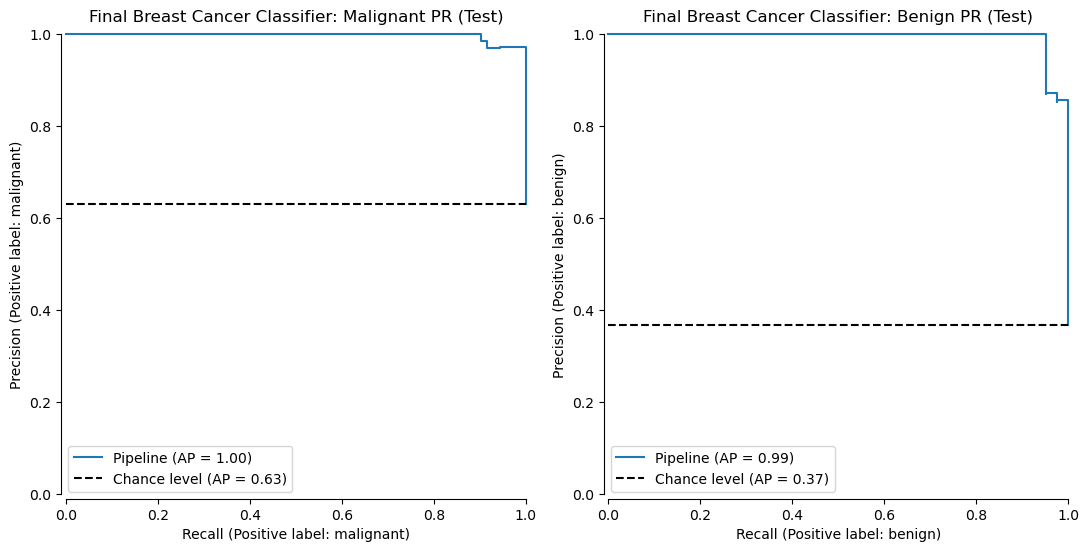

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(11, 11))
axs = axs.flatten()
count = 0
for label in test_labels:
    disp = PrecisionRecallDisplay.from_estimator(best_model, X_test, y_test, ax=axs[count], pos_label=label, plot_chance_level=True, despine=True)
    disp.ax_.set_title(f"Final Breast Cancer Classifier: {label.capitalize()} PR (Test)")
    count += 1

plt.tight_layout()  
plt.show()

<h1><strong><u>Final Thoughts</u></strong></h1>
Overall, I believe that the Logistic Regression was by far the better model. All in all, I am pleased with the results.